In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motors/motors.csv
/kaggle/input/coffee-sales/index.csv
/kaggle/input/professors/pakistan_intellectual_capital.csv


# Content of the Notebook:
* Dealing with Dates
* Dealing with missing values
* unique inconsistency
* out of range values
* data types
* Duplicated Data

### we will use multiple datasets (3 datasets ) to check the topics we had to say

# Dealing with Dates
## we need to check the data type of it , how to extract month , day , year from it 

In [2]:
df1=pd.read_csv("/kaggle/input/coffee-sales/index.csv")

In [3]:
df1.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df1.info()
# there are two values of dates that need to convert their type to date
# card column has also a missing values that need to be dealt with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1208 non-null   object 
 1   datetime     1208 non-null   object 
 2   cash_type    1208 non-null   object 
 3   card         1119 non-null   object 
 4   money        1208 non-null   float64
 5   coffee_name  1208 non-null   object 
dtypes: float64(1), object(5)
memory usage: 56.8+ KB


In [5]:
df1['date'] = pd.to_datetime(df1['date'], errors='coerce').dt.date
df1['datetime'] = pd.to_datetime(df1['datetime'], errors='coerce')
# errors = coerce will make it return nan values for values that can't be converted
df1.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
today = dt.date.today()   ## this will return today's date (which will be the date that I made the notebook in)
df1[['date']][df1['date'] > today]
# there is no future dates needed to be cleaned

,date


In [7]:
df1['month'] = df1['datetime'].dt.month   # this will extract the month from the date
df1['day'] = df1['datetime'].dt.day       # this will extract the day from the date
df1['hour'] = df1['datetime'].dt.hour # this will extract the hour from the date
df1.head()
# now we can drop the two columns date and date time as we no longer need it , but i'll keep them

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,1,13


# Dealing with missing values

### there are 3 techniques to deal with missing values :
1. if the missing values are too much  -> it is better to drop the column
2. if the missing values are too small -> it is good to drop the missing values 
3. if the missing values are greater than 5% -> we need to impute them with one of these (mean,median,mode) each has its case 

### Case 3 in dealing with missing values

In [8]:
df1.isna().sum()/len(df1)*100
# card hasn't much null values so we can impute it using mode as it is

date           0.00000
datetime       0.00000
cash_type      0.00000
card           7.36755
money          0.00000
coffee_name    0.00000
month          0.00000
day            0.00000
hour           0.00000
dtype: float64

In [9]:
df1.fillna(df1['card'].mode()[0],inplace=True)
# as the column is object we can impute it with mode

In [10]:
df1.isna().sum()/len(df1)*100 # all is clean

date           0.0
datetime       0.0
cash_type      0.0
card           0.0
money          0.0
coffee_name    0.0
month          0.0
day            0.0
hour           0.0
dtype: float64

## we will read another data about professors so we can deal with different techniques on cleaning

In [11]:
df2=pd.read_csv("/kaggle/input/professors/pakistan_intellectual_capital.csv")

In [12]:
df2.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [13]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 1142 non-null   int64  
 1   S#                                         1142 non-null   int64  
 2   Teacher Name                               1142 non-null   object 
 3   University Currently Teaching              1142 non-null   object 
 4   Department                                 1142 non-null   object 
 5   Province University Located                1142 non-null   object 
 6   Designation                                1123 non-null   object 
 7   Terminal Degree                            1138 non-null   object 
 8   Graduated from                             1142 non-null   object 
 9   Country                                    1142 non-null   object 
 10  Year                    

In [14]:
df2.isna().sum()/len(df2)*100
# there are columns that have alot of nan values the one thing that we can do in that case is drop those columns

Unnamed: 0                                    0.000000
S#                                            0.000000
Teacher Name                                  0.000000
University Currently Teaching                 0.000000
Department                                    0.000000
Province University Located                   0.000000
Designation                                   1.663748
Terminal Degree                               0.350263
Graduated from                                0.000000
Country                                       0.000000
Year                                         57.180385
Area of Specialization/Research Interests    45.446585
Other Information                            89.141856
dtype: float64

### Case 1 in dealing with missing values

In [15]:
df2.drop(['Unnamed: 0','Year','Area of Specialization/Research Interests','Other Information'],axis=1,inplace=True)

In [16]:
# the remaining null values doesn't exceed 5% so we can drop it
df2.dropna(inplace=True)

# Data Inconsistency


In [17]:
df2['Country'].unique()
# there are names of same country but with different formate so we can handle this by strip and replace
# country like SouthKorea South Korea are the same and 'USA' ' USA' also the same

array(['Thailand', 'Pakistan', 'germany', 'Austria', 'Australia', 'UK',
       'China', 'France', 'USofA', 'SouthKorea', 'Malaysia', 'Sweden',
       'Italy', 'Canada', 'Norway', 'Ireland', 'New Zealand', 'Urbana',
       'Portugal', 'Russian Federation', 'USA', 'Finland', ' USA',
       'Netherland', ' Germany', ' Sweden', ' New Zealand', 'Greece',
       'Turkey', 'South Korea', 'Macau', 'Singapore', 'Spain', 'Japan',
       'HongKong', 'Saudi Arabia', 'Mauritius', 'Scotland'], dtype=object)

In [18]:
df2['Country']=df2['Country'].str.strip()
df2['Country'] = df2['Country'].replace('SouthKorea', 'South Korea')
df2['Country'].unique()

array(['Thailand', 'Pakistan', 'germany', 'Austria', 'Australia', 'UK',
       'China', 'France', 'USofA', 'South Korea', 'Malaysia', 'Sweden',
       'Italy', 'Canada', 'Norway', 'Ireland', 'New Zealand', 'Urbana',
       'Portugal', 'Russian Federation', 'USA', 'Finland', 'Netherland',
       'Germany', 'Greece', 'Turkey', 'Macau', 'Singapore', 'Spain',
       'Japan', 'HongKong', 'Saudi Arabia', 'Mauritius', 'Scotland'],
      dtype=object)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1119 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   S#                             1119 non-null   int64 
 1   Teacher Name                   1119 non-null   object
 2   University Currently Teaching  1119 non-null   object
 3   Department                     1119 non-null   object
 4   Province University Located    1119 non-null   object
 5   Designation                    1119 non-null   object
 6   Terminal Degree                1119 non-null   object
 7   Graduated from                 1119 non-null   object
 8   Country                        1119 non-null   object
dtypes: int64(1), object(8)
memory usage: 87.4+ KB


## we will read another data about motors so we can deal with different techniques on cleaning

In [20]:
df3=pd.read_csv("/kaggle/input/motors/motors.csv")

In [21]:
df3.head()

,Unnamed: 0,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Cooling system,Transmission type,Gearbox_types
0,0,acabion,da vinci 650-vi,2011,Prototype / concept model,NaN,804.0,Electric,Electric,6.0,13.5,Carburettor,Liquid,Chain,Manual
1,1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6.0,13.5,Turbo. KKK Acabion Extended,Liquid,Chain,Manual
2,2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,NaN,536.0,Electric,Electric,6.0,13.5,Carburettor,Liquid,Chain,Manual
3,3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,536.0,Electric,Electric,6.0,13.5,Carburettor,Liquid,Chain,Manual
4,4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6.0,13.5,Turbo. KKK Acabion Extended,Liquid,Chain,Manual


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38504 entries, 0 to 38503
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           38504 non-null  int64  
 1   Brand                38504 non-null  object 
 2   Model                38504 non-null  object 
 3   Year                 38504 non-null  object 
 4   Category             38504 non-null  object 
 5   Displacement (ccm)   37475 non-null  float64
 6   Power (hp)           38504 non-null  float64
 7   Engine cylinder      38504 non-null  object 
 8   Engine stroke        38504 non-null  object 
 9   Gearbox              38504 non-null  float64
 10  Fuel capacity (lts)  38504 non-null  float64
 11  Fuel system          38504 non-null  object 
 12  Cooling system       38504 non-null  object 
 13  Transmission type    38504 non-null  object 
 14  Gearbox_types        38504 non-null  object 
dtypes: float64(4), int64(1), object(10)


In [23]:
df3.isna().sum()/len(df3)*100

Unnamed: 0             0.00000
Brand                  0.00000
Model                  0.00000
Year                   0.00000
Category               0.00000
Displacement (ccm)     2.67245
Power (hp)             0.00000
Engine cylinder        0.00000
Engine stroke          0.00000
Gearbox                0.00000
Fuel capacity (lts)    0.00000
Fuel system            0.00000
Cooling system         0.00000
Transmission type      0.00000
Gearbox_types          0.00000
dtype: float64

## Dealing with missing values 

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

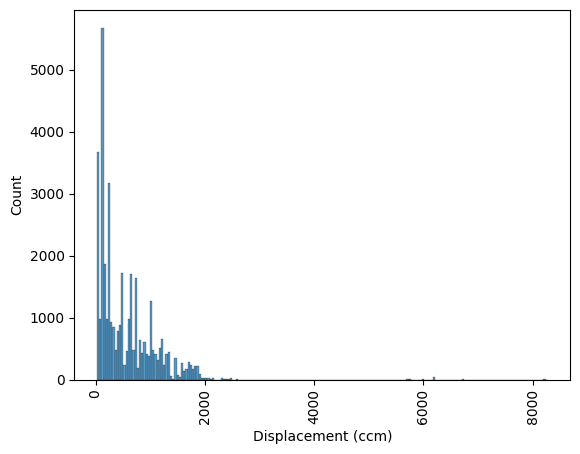

In [24]:
sns.histplot(data=df3,x='Displacement (ccm)')
plt.xticks(rotation=90)
# as there is left skew on data its better to replace the null values with median rather than mean

In [25]:
df3['Displacement (ccm)'].fillna(df3['Displacement (ccm)'].median(),inplace=True) # impute the null values with median

# Data Types

In [26]:
df3['Year'].unique()
# i notice that there is future year 2040 which is unlogical
# I notice that there are some rows that contain chars not only integers
# the data type need to change to int also removing CE that is next to year

array(['2011', '2007', '2021', '2016', '2018', '2020', '2022', '1923',
       '1924', '1925', '1926', '1927', '2009', '2010', '2014', '2008',
       '2019', '2012', '2013', '2040', '1957', '1958', '1955', '1956',
       '1952', '1953', '1954', '1959', '1960', '2077', '2003', '3019',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1971', '1972', '1970', '1974', '1962 CE', '1963 CE',
       '2005', '2015', '2018 CE', '2006', '1922', '1928', '1949', '1950',
       '1951', '2001', '2017', '1986', '1999', '1985', '1987', '1996',
       '1991', '1988', '1989', '1990', '1992', '2004', '2002', '1997',
       '1998', '2000', '1993', '1984', '1995', '1948', '1937', '1938',
       '1931', '1901', '1902', '1903', '1913', '1914', '1915', '1916',
       '1918', '1932', '1933', '1934', '1935', '1936', '1939', '1940',
       '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1898',
       '1910', '1929', '1975', '1976', '1973', '1977', '1978', '1979',
     

In [27]:
df3['Year']=df3['Year'].str.replace(' CE','')
df3['Year']=df3['Year'].astype(int)


In [28]:
df3['Year'].unique()

array([2011, 2007, 2021, 2016, 2018, 2020, 2022, 1923, 1924, 1925, 1926,
       1927, 2009, 2010, 2014, 2008, 2019, 2012, 2013, 2040, 1957, 1958,
       1955, 1956, 1952, 1953, 1954, 1959, 1960, 2077, 2003, 3019, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1970,
       1974, 2005, 2015, 2006, 1922, 1928, 1949, 1950, 1951, 2001, 2017,
       1986, 1999, 1985, 1987, 1996, 1991, 1988, 1989, 1990, 1992, 2004,
       2002, 1997, 1998, 2000, 1993, 1984, 1995, 1948, 1937, 1938, 1931,
       1901, 1902, 1903, 1913, 1914, 1915, 1916, 1918, 1932, 1933, 1934,
       1935, 1936, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1898, 1910, 1929, 1975, 1976, 1973, 1977, 1978, 1979, 1980, 1982,
       1983, 1981, 1917, 1919, 1994, 1930, 1897, 1920, 1921, 1899, 1900,
       1904, 1896, 1911, 1912, 1909, 1905, 1906, 1907, 1908, 1894, 1895])

# Out of range values

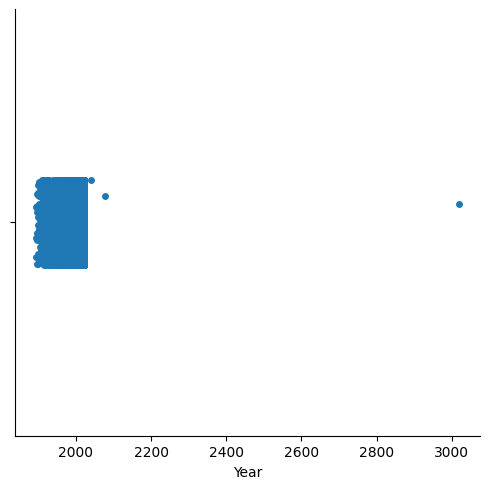

In [29]:
 sns.catplot(data=df3,x='Year')
 # there is an outlier so we need to deal with it

In [30]:
df3['Year'][df3['Year']>2024]
# as we can see there is out of range data so we will replace it with 2024

58     2040
133    2077
170    3019
Name: Year, dtype: int64

In [31]:
df3['Year'][df3['Year']>2024]=2024

# Duplicated Data

In [32]:
df3.head()

,Unnamed: 0,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Cooling system,Transmission type,Gearbox_types
0,0,acabion,da vinci 650-vi,2011,Prototype / concept model,397.0,804.0,Electric,Electric,6.0,13.5,Carburettor,Liquid,Chain,Manual
1,1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6.0,13.5,Turbo. KKK Acabion Extended,Liquid,Chain,Manual
2,2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,397.0,536.0,Electric,Electric,6.0,13.5,Carburettor,Liquid,Chain,Manual
3,3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,397.0,536.0,Electric,Electric,6.0,13.5,Carburettor,Liquid,Chain,Manual
4,4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6.0,13.5,Turbo. KKK Acabion Extended,Liquid,Chain,Manual


In [33]:
df3.duplicated().sum()
# there is no duplicated data as there is column called unnamed 0 contains unique values it is better to drop it as it is not important
# but let us not drop it and know how to know the duplicated data using subset of features

0

In [34]:
df3.duplicated(subset=['Brand', 'Model', 'Year', 'Category', 'Displacement (ccm)', 'Power (hp)', 'Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel capacity (lts)', 'Fuel system', 'Cooling system', 'Transmission type', 'Gearbox_types']).sum()

# there is now 72 row the is duplicated so we will drop them

72

In [35]:
df3.drop_duplicates(subset=['Brand', 'Model', 'Year', 'Category', 'Displacement (ccm)', 'Power (hp)', 'Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel capacity (lts)', 'Fuel system', 'Cooling system', 'Transmission type', 'Gearbox_types'],inplace=True)


In [36]:
df3.duplicated(subset=['Brand', 'Model', 'Year', 'Category', 'Displacement (ccm)', 'Power (hp)', 'Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel capacity (lts)', 'Fuel system', 'Cooling system', 'Transmission type', 'Gearbox_types']).sum()

# Lets check now there is no duplicated data

0

# This is the END of Cleaning Notebook , Thanks